In [2]:
import pandas as pd
import numpy as np

In [7]:
db = pd.read_csv(r"C:\Users\laksh\NIDS_Prediction\Total_CSVs\NIDS_Dataset.csv")

In [8]:
db.head()

,Unnamed: 0,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,0,1,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,1,0,0,0,0,0,0,1,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,2,0,0,0,0,0,0,1,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,3,0,0,0,0,0,0,1,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,4,0,0,0,0,0,0,1,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign


In [9]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [10]:
db = db.iloc[:,1:46]

In [11]:
db = db.iloc[:,0:45]

In [12]:
db

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [13]:
x1 = db.iloc[:,0:45]
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
0,0,0,0,0,0,0,1,0,0,0,...,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178,Benign
1,0,0,0,0,0,0,1,0,0,0,...,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056,Benign
2,0,0,0,0,0,0,1,0,0,0,...,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369,Benign
3,0,0,0,0,0,0,1,0,0,0,...,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256,Benign
4,0,0,0,0,0,0,1,0,0,0,...,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881,Malicious
269639,1,0,0,0,0,0,0,0,0,0,...,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549,Malicious
269640,1,0,0,0,0,0,0,0,0,0,...,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937,Malicious
269641,1,0,0,0,0,0,0,0,0,0,...,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511,Malicious


In [14]:
x1 = db.iloc[:,0:44]
y1 = db.iloc[:,44]

In [15]:
x1

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,s_mode_time,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time
0,0,0,0,0,0,0,1,0,0,0,...,1.562871,-1.135513,-0.178935,-0.242217,-0.237193,-0.218589,-0.159629,-0.807492,0.773925,-0.388178
1,0,0,0,0,0,0,1,0,0,0,...,-2.909475,-0.882221,-0.178930,-0.240318,-0.239660,-0.221809,-0.159613,-0.153837,0.146645,-0.157056
2,0,0,0,0,0,0,1,0,0,0,...,-0.381118,0.200209,-0.156441,0.115037,-0.217159,-0.221747,-0.159634,0.447061,-0.399077,2.175369
3,0,0,0,0,0,0,1,0,0,0,...,0.617898,-0.788347,-0.178938,-0.243053,-0.241114,-0.225992,-0.159633,1.398031,0.092140,-0.112256
4,0,0,0,0,0,0,1,0,0,0,...,0.428250,-0.678286,-0.178946,-0.250232,5.245053,4.540288,6.300846,-5.075614,-7.198931,-0.632209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269638,1,0,0,0,0,0,0,0,0,0,...,-0.616616,0.748533,-0.178941,-0.244679,-0.239679,-0.221606,-0.159583,-0.624305,0.650562,-0.364881
269639,1,0,0,0,0,0,0,0,0,0,...,1.499615,-1.119040,-0.178929,-0.240170,-0.238542,-0.218699,-0.159629,-1.036147,0.308279,-0.249549
269640,1,0,0,0,0,0,0,0,0,0,...,-0.889490,1.888898,-0.178946,-0.250202,-0.243936,-0.226444,-0.159625,0.234809,0.157984,-0.356937
269641,1,0,0,0,0,0,0,0,0,0,...,-0.665595,0.900145,-0.178939,-0.243902,-0.240051,-0.221605,-0.159626,-0.732100,0.427483,-0.298511


In [16]:
np.isnan(x1).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [17]:
y1.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Benign, dtype: object

In [18]:
from collections import Counter

print(Counter(y1))

Counter({'Malicious': 249836, 'Benign': 19807})


In [19]:
c_class_0, c_class_1 = db.Benign.value_counts()

In [20]:
c_class_0, c_class_1 = db.Benign.value_counts()

In [21]:
print(c_class_0)
print(c_class_1)

249836
19807


In [22]:
df_c_0 = db[db['Benign'] == 'Malicious']
df_c_1 = db[db['Benign'] == 'Benign']

In [23]:
df_c_0_under = df_c_0.sample(c_class_1)

In [24]:
df_under = pd.concat([df_c_0_under, df_c_1], axis=0)

In [25]:
print(df_under.Benign.value_counts())

Malicious    19807
Benign       19807
Name: Benign, dtype: int64


In [26]:
df_Totoal = df_under

In [27]:
df_Totoal.head()

,ip_1,ip_144,ip_204,ip_205,ip_207,ip_8,not_freq,ip_4,ip_11,dest_ip_130_1_8,...,0,r_time_var,r_time_std,r_time_mean,r_time_med,r_time_mode,r_s_med_time,r_s_mode_time,r_c_time,Benign
87148,0,1,0,0,0,0,0,0,0,1,...,2.798237,-0.178942,-0.245446,-0.239253,-0.221624,-0.159620,-0.423025,0.982577,-0.422700,Malicious
178126,1,0,0,0,0,0,0,0,0,0,...,2.788291,-0.178935,-0.242083,-0.238718,-0.221295,-0.159626,-0.082428,0.467011,-0.311833,Malicious
226472,0,1,0,0,0,0,0,0,1,0,...,-0.894213,-0.178915,-0.236645,-0.239768,-0.226449,-0.159621,1.349310,-0.042499,0.035818,Malicious
117089,0,1,0,0,0,0,0,0,1,0,...,-0.868572,-0.178946,-0.250179,-0.238398,-0.221630,-0.153130,-0.179511,0.439456,-0.630271,Malicious
75522,0,0,0,0,1,0,0,0,1,0,...,0.956658,-0.178940,-0.244231,-0.240192,-0.221616,-0.159616,-0.862992,0.441002,-0.303977,Malicious


In [28]:
x = df_Totoal.iloc[:,0:44]
y = df_Totoal.iloc[:,44]

In [29]:
np.isnan(x).any()

ip_1                    False
ip_144                  False
ip_204                  False
ip_205                  False
ip_207                  False
ip_8                    False
not_freq                False
ip_4                    False
ip_11                   False
dest_ip_130_1_8         False
not_dest_freq           False
Wrong_port              False
port_is_443             False
Wrong_port.1            False
destination_port_443    False
Duration                False
fs_1807                 False
fs_more                 False
fsless                  False
FlowSentRate            False
FlowRecvRate            False
Pcket_lenVar            False
Length_std              False
Length_mean             False
L_median                False
L_mode                  False
s_median                False
s_mode                  False
PLCV                    False
PTV                     False
PT_std                  False
PT_mean                 False
PT_median               False
Packt_Time

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [31]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [32]:
x_train.shape

(31691, 44)

In [33]:
cvscores = []
i=0
for train, test in kfold.split(x_train, y_train):
    cnn = Sequential()
    cnn.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(44,1)))
    cnn.add(MaxPooling1D(pool_size=(2)))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation="relu"))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(2, activation="sigmoid"))
    # define optimizer and objective, compile cnn


    cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
    
    
    x_tn = x_train.iloc[train]
    y_tn = y_train.iloc[train]
    y_tn = pd.get_dummies(y_tn)
    x_ts = x_train.iloc[test]
    y_ts = y_train.iloc[test]
    y_ts = pd.get_dummies(y_ts)
    
    x_tn1 = x_tn.to_numpy()
    x_tn1 = np.reshape(x_tn1, (x_tn1.shape[0],x_tn1.shape[1],1))
    
    
    x_ts1 = x_ts.to_numpy()
    x_ts1 = np.reshape(x_ts1, (x_ts1.shape[0],x_ts1.shape[1],1))
    
    cnn.fit(x_tn1, y_tn, epochs=50,batch_size=64,verbose=1)
    scores = cnn.evaluate(x_ts1, y_ts, verbose=1)
    print(str(i)+"th Fold :")
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    i = i+1
    print("------------------------------------------------------------------")


print("Average validation accuracy : ")   
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/50
446/446 [==============================] - 8s 14ms/step - loss: 0.2131 - accuracy: 0.9225
Epoch 2/50
446/446 [==============================] - 6s 14ms/step - loss: 0.1587 - accuracy: 0.9412
Epoch 3/50
446/446 [==============================] - 7s 17ms/step - loss: 0.1527 - accuracy: 0.9432
Epoch 4/50
446/446 [==============================] - 8s 18ms/step - loss: 0.1499 - accuracy: 0.9428
Epoch 5/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1484 - accuracy: 0.9435
Epoch 6/50
446/446 [==============================] - 7s 16ms/step - loss: 0.1491 - accuracy: 0.9442
Epoch 7/50
446/446 [==============================] - 6s 14ms/step - loss: 0.1475 - accuracy: 0.9447
Epoch 8/50
446/446 [==============================] - 6s 14ms/step - loss: 0.1454 - accuracy: 0.9440
Epoch 9/50
446/446 [==============================] - 7s 15ms/step - loss: 0.1456 - accuracy: 0.9440
Epoch 10/50
446/446 [==============================] - 7s 17ms/step - loss: 0.1466 - accura

446/446 [==============================] - 5s 11ms/step - loss: 0.1424 - accuracy: 0.9452
Epoch 30/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1429 - accuracy: 0.9448
Epoch 31/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1423 - accuracy: 0.9452
Epoch 32/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1425 - accuracy: 0.9454
Epoch 33/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1419 - accuracy: 0.9462
Epoch 34/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1415 - accuracy: 0.9454
Epoch 35/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1419 - accuracy: 0.9449
Epoch 36/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1413 - accuracy: 0.9451
Epoch 37/50
446/446 [==============================] - 4s 9ms/step - loss: 0.1417 - accuracy: 0.9457
Epoch 38/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1414 - accuracy: 

446/446 [==============================] - 4s 10ms/step - loss: 0.1511 - accuracy: 0.9421
Epoch 7/50
446/446 [==============================] - 4s 10ms/step - loss: 0.1489 - accuracy: 0.9440
Epoch 8/50
446/446 [==============================] - 4s 10ms/step - loss: 0.1491 - accuracy: 0.9440
Epoch 9/50
446/446 [==============================] - 4s 10ms/step - loss: 0.1481 - accuracy: 0.9433
Epoch 10/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1495 - accuracy: 0.9437
Epoch 11/50
446/446 [==============================] - 4s 9ms/step - loss: 0.1468 - accuracy: 0.9431
Epoch 12/50
446/446 [==============================] - 4s 9ms/step - loss: 0.1471 - accuracy: 0.9435
Epoch 13/50
446/446 [==============================] - 4s 10ms/step - loss: 0.1451 - accuracy: 0.9443
Epoch 14/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1463 - accuracy: 0.9445
Epoch 15/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1457 - accuracy: 0.94

446/446 [==============================] - 5s 11ms/step - loss: 0.1435 - accuracy: 0.9445
Epoch 35/50
446/446 [==============================] - 5s 12ms/step - loss: 0.1431 - accuracy: 0.9444
Epoch 36/50
446/446 [==============================] - 8s 17ms/step - loss: 0.1424 - accuracy: 0.9452
Epoch 37/50
446/446 [==============================] - 7s 16ms/step - loss: 0.1425 - accuracy: 0.9448
Epoch 38/50
446/446 [==============================] - 8s 18ms/step - loss: 0.1431 - accuracy: 0.9454
Epoch 39/50
446/446 [==============================] - 6s 14ms/step - loss: 0.1425 - accuracy: 0.9453
Epoch 40/50
446/446 [==============================] - 8s 19ms/step - loss: 0.1432 - accuracy: 0.9455
Epoch 41/50
446/446 [==============================] - 8s 18ms/step - loss: 0.1426 - accuracy: 0.9449
Epoch 42/50
446/446 [==============================] - 6s 14ms/step - loss: 0.1423 - accuracy: 0.9457
Epoch 43/50
446/446 [==============================] - 8s 18ms/step - loss: 0.1424 - accuracy:

446/446 [==============================] - 4s 10ms/step - loss: 0.1460 - accuracy: 0.9459
Epoch 12/50
446/446 [==============================] - 4s 10ms/step - loss: 0.1442 - accuracy: 0.9453
Epoch 13/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1434 - accuracy: 0.9463
Epoch 14/50
446/446 [==============================] - 4s 10ms/step - loss: 0.1436 - accuracy: 0.9465
Epoch 15/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1444 - accuracy: 0.9451
Epoch 16/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1429 - accuracy: 0.9459
Epoch 17/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1435 - accuracy: 0.9456
Epoch 18/50
446/446 [==============================] - 4s 10ms/step - loss: 0.1433 - accuracy: 0.9448
Epoch 19/50
446/446 [==============================] - 4s 9ms/step - loss: 0.1431 - accuracy: 0.9465
Epoch 20/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1427 - accuracy: 

446/446 [==============================] - 5s 11ms/step - loss: 0.1429 - accuracy: 0.9460
Epoch 40/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1426 - accuracy: 0.9452
Epoch 41/50
446/446 [==============================] - 5s 12ms/step - loss: 0.1419 - accuracy: 0.9454
Epoch 42/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1423 - accuracy: 0.9457
Epoch 43/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1415 - accuracy: 0.9462
Epoch 44/50
446/446 [==============================] - 8s 18ms/step - loss: 0.1431 - accuracy: 0.9459
Epoch 45/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1417 - accuracy: 0.9460
Epoch 46/50
446/446 [==============================] - 5s 11ms/step - loss: 0.1421 - accuracy: 0.9448
Epoch 47/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1415 - accuracy: 0.9458
Epoch 48/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1417 - accuracy:

446/446 [==============================] - 7s 15ms/step - loss: 0.1446 - accuracy: 0.9464
Epoch 17/50
446/446 [==============================] - 8s 18ms/step - loss: 0.1425 - accuracy: 0.9452
Epoch 18/50
446/446 [==============================] - 8s 19ms/step - loss: 0.1427 - accuracy: 0.9455
Epoch 19/50
446/446 [==============================] - 7s 17ms/step - loss: 0.1415 - accuracy: 0.9455
Epoch 20/50
446/446 [==============================] - 9s 19ms/step - loss: 0.1417 - accuracy: 0.9456
Epoch 21/50
446/446 [==============================] - 9s 19ms/step - loss: 0.1414 - accuracy: 0.9464
Epoch 22/50
446/446 [==============================] - 5s 12ms/step - loss: 0.1425 - accuracy: 0.9461
Epoch 23/50
446/446 [==============================] - 5s 10ms/step - loss: 0.1407 - accuracy: 0.9459
Epoch 24/50
446/446 [==============================] - 6s 13ms/step - loss: 0.1414 - accuracy: 0.9449
Epoch 25/50
446/446 [==============================] - 5s 12ms/step - loss: 0.1407 - accuracy:

In [34]:
x_tr = x_train.to_numpy()
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1],1))

In [35]:
x_ts = x_test.to_numpy()
x_ts = np.reshape(x_ts, (x_ts.shape[0], x_ts.shape[1],1))

In [36]:
y_tr = pd.get_dummies(y_train)
y_ts = pd.get_dummies(y_test)

In [37]:
_, train_acc = cnn.evaluate(x_tr, y_tr, verbose=1)
_, test_acc = cnn.evaluate(x_ts, y_ts, verbose=1)

248/248 [==============================] - 1s 5ms/step - loss: 0.1421 - accuracy: 0.9419


In [38]:
print("Training accuracy: "+str(train_acc*100))
print("Test accuracy: "+str(test_acc*100))

Training accuracy: 94.78400945663452
Test accuracy: 94.19412016868591


In [39]:
y_probs = cnn.predict(x_ts, verbose=1).ravel()
#y_classes = cnn.predict_classes(x_ts, verbose=1)
#y_classes = (cnn.predict(x_ts) > 0.5).astype("int32")
y_classes = np.argmax(cnn.predict(x_ts), axis=-1)

248/248 [==============================] - 1s 5ms/step


In [40]:
y_pred = pd.get_dummies(y_classes)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3926
           1       0.96      0.92      0.94      3997

   micro avg       0.94      0.94      0.94      7923
   macro avg       0.94      0.94      0.94      7923
weighted avg       0.94      0.94      0.94      7923
 samples avg       0.94      0.94      0.94      7923



In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
y_test_le = le.fit_transform(y_test)

In [44]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_le, y_classes)

In [45]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [46]:
from matplotlib import pyplot

In [47]:
print(auc_keras)

0.9421197648108727


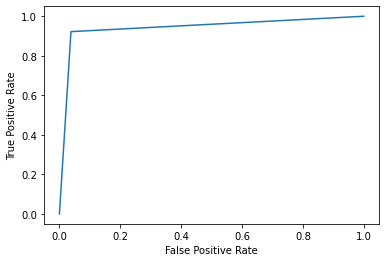

In [48]:
pyplot.plot(fpr_keras, tpr_keras)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [50]:
cnn.save("NIDS.h5")